In [1]:
import tensorflow as tf
import numpy as np
import random
import cv2
import os
import sys
import matplotlib.pyplot as plt

print('pythpm : ',sys.version)
print('tensorflow : ',tf.__version__)

pythpm :  3.6.4 (v3.6.4:d48ecebad5, Dec 18 2017, 21:07:28) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
tensorflow :  1.7.0


INFO:tensorflow:Restoring parameters from ./save/model.ckpt
(1, 65536)
Tensor("x:0", shape=(?, 65536), dtype=float32)
[[137.12001 137.12001 132.96385 ... 152.06664 138.62059 138.62059]
 [137.12001 137.12001 132.96385 ... 152.06664 138.62059 138.62059]
 [132.83377 132.83377 128.87083 ... 132.78105 138.74432 138.74432]
 ...
 [131.05756 131.05756 132.63026 ... 128.80322 133.84352 133.84352]
 [135.91241 135.91241 135.50128 ... 128.36014 134.91406 134.91406]
 [135.91241 135.91241 135.50128 ... 128.36014 134.91406 134.91406]]


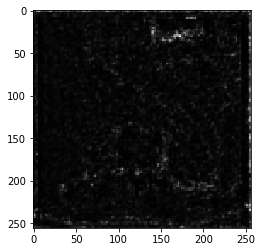

In [20]:
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./save/model.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./save'))
    graph = tf.get_default_graph()
    
    input_image = './data/x/0.jpg'
    image = np.array(cv2.imread(input_image, 0))
    image = image.reshape((1, 65536))
    print(image.shape)

    # get tensors
    x = graph.get_tensor_by_name("x:0")
    result = graph.get_tensor_by_name("result:0")
    
    print(x)

    segmentation = sess.run(result, feed_dict={x: image})
    segmentation = segmentation.reshape((256,256))
    segmentation = segmentation * 255
    print(segmentation)
    
    plt.imshow(segmentation,plt.cm.gray)
    plt.show()
    
    